In [7]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [8]:
orgData = pd.read_csv('/content/drive/MyDrive/Mini Project/Test_Signal_Data.csv')
orgData = orgData.iloc[:,1:5]
orgData['Error'] = 0
orgData

,Fc,Tc,Tr,Tj,Error
0,0.500,32.111391,35.444293,31.247891,0
1,0.500,32.263773,34.946917,31.552655,0
2,0.500,32.136788,35.413207,31.603449,0
3,0.500,32.416155,35.351035,31.933611,0
4,0.500,32.111391,35.413207,31.578052,0
...,...,...,...,...,...
10295,0.125,31.882817,59.473766,40.543212,0
10296,0.125,31.527258,59.411594,40.847977,0
10297,0.125,31.552655,59.411594,40.746389,0
10298,0.125,31.425670,59.038562,40.720992,0


In [9]:
dataFc = pd.read_csv('/content/drive/MyDrive/Mini Project/FinalData/Fc_Error.xlsx')
dataTc = pd.read_csv('/content/drive/MyDrive/Mini Project/FinalData/Tc_error.csv')
dataTr = pd.read_csv('/content/drive/MyDrive/Mini Project/FinalData/Tr_error.csv')
dataTj = pd.read_csv('/content/drive/MyDrive/Mini Project/FinalData/Tj_error.csv')

dataTc = dataTc.loc[dataTc["Error"]==2,"Fc":]
dataTr = dataTr.loc[dataTr["Error"]==3,"Fc":]
dataTj = dataTj.loc[dataTj["Error"]==4,"Fc":]
dataFc = dataFc.loc[dataFc["Error"]==1,"Fc":]

data = pd.concat([orgData,dataFc,dataTc,dataTr,dataTj],ignore_index=True)
data

,Fc,Tc,Tr,Tj,Error
0,0.500,32.111391,35.444293,31.247891,0
1,0.500,32.263773,34.946917,31.552655,0
2,0.500,32.136788,35.413207,31.603449,0
3,0.500,32.416155,35.351035,31.933611,0
4,0.500,32.111391,35.413207,31.578052,0
...,...,...,...,...,...
58264,0.125,31.400273,60.499604,43.146687,4
58265,0.125,31.146303,61.214582,43.075980,4
58266,0.125,31.730435,60.375260,42.675112,4
58267,0.125,31.654244,60.686120,42.934566,4


In [10]:
X = data.iloc[:,[0,1,2,3]]
y = data.iloc[:,4]

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority')
X,y = rus.fit_resample(X,y)
print("rev index:",X.shape)

rev index: (56569, 4)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['Fc','Tc','Tr','Tj']] = sc.fit_transform(X_train[['Fc','Tc','Tr','Tj']])
X_test[['Fc','Tc','Tr','Tj']] = sc.transform(X_test[['Fc','Tc','Tr','Tj']])

In [13]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',C=0.5,gamma=100,decision_function_shape="ovo")
clf.fit(X_train,y_train)

SVC(C=0.5, decision_function_shape='ovo', gamma=100)

In [14]:
y_pred = clf.predict(X_test)

In [15]:
X_train = X_train.values

In [16]:
X_set, Y_set = X_train[:,[2,3]], y_train
clf1 = SVC(kernel='rbf',C=0.5 ,gamma=100,decision_function_shape='ovo')
clf1.fit(X_set,Y_set)

SVC(C=0.5, decision_function_shape='ovo', gamma=100)

<ipython-input-17-155fd46efb55>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


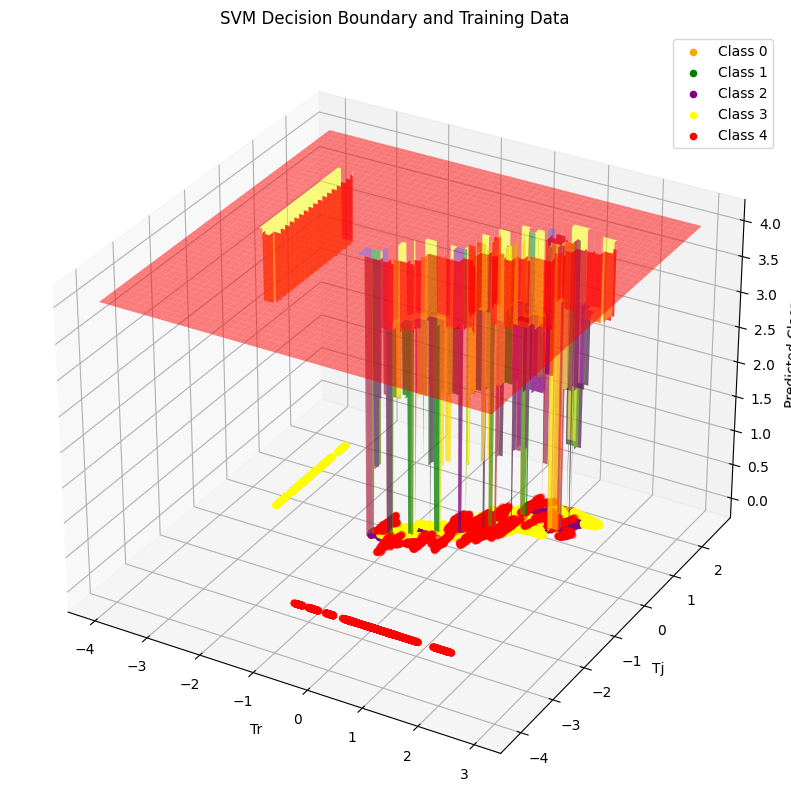

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D


# # Extract selected features from the dataset
# X_set, Y_set = X_train, y_train

# # Train an SVM model with an RBF kernel (replace this with your actual model)
# clf1 = SVC(kernel='rbf', C=0.1,gamma=0.1,decision_function_shape='ovo')
# clf1.fit(X_set, Y_set)

# Create a meshgrid for decision boundary in 3D
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Flatten and predict labels for the meshgrid
Z = clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot 3D decision boundary
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, alpha=0.5, cmap=ListedColormap(('orange', 'green', 'purple', 'yellow', 'red')))

# Plot 3D scatter plot for data points
for i, j in enumerate(np.unique(Y_set)):
    ax.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
               c=ListedColormap(('orange', 'green', 'purple', 'yellow', 'red'))(i), label=f'Class {j}')

ax.set_title('SVM Decision Boundary and Training Data')
ax.set_xlabel('Tr')
ax.set_ylabel('Tj')
ax.set_zlabel('Predicted Class')
ax.legend()

plt.show()